In [1]:
"""
Demonstrate an ensemble ml algorithm using bagging, boosting and voting models on Pima Indians dataset

Ensembles can give u a boost in accuracy in your dataset 

Bagging: Building multiple models from differnt subsamples of training dataset  

Boosting: Building multiple models each of which learns to fix the prediction errors of a prior model in the chain.

VOting: Building multiple models and simple statistics are used to combine predictions

a standard classification problem used to demonstrate each ensemble algorithm is the Pima Indians dataset .
It is a Binary classifi

"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


In [3]:
#loading the data
df = pd.read_csv("D:\machinelearning\diabetes.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
pd.set_option("display.float_format","{:.2f}".format)
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0 33.60   
1              1       85             66             29        0 26.60   
2              8      183             64              0        0 23.30   
3              1       89             66             23       94 28.10   
4              0      137             40             35      168 43.10   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180 32.90   
764            2      122             70             27        0 36.80   
765            5      121             72             23      112 26.20   
766            1      126             60              0        0 30.10   
767            1       93             70             31        0 30.40   

     DiabetesPedigreeFunction  Age  Outcome  
0                        0.63  

In [6]:
categorical_val = []
continuos_val = []
for c in df.columns:
    print("==================")
    print(f"{c}:{df[c].unique()}")
    if len(df[c].unique()) <= 0:
        categorical_val.append(c)
    else:
        continuos_val.append(c)

Pregnancies:[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose:[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure:[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness:[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 9

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
feature_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
for c in feature_columns:
    print("===================")
    print(f"{c} ==> MISSING ZEROES: {len(df.loc[df[c] == 0])}")

Pregnancies ==> MISSING ZEROES: 0
Glucose ==> MISSING ZEROES: 0
BloodPressure ==> MISSING ZEROES: 0
SkinThickness ==> MISSING ZEROES: 0
Insulin ==> MISSING ZEROES: 0
BMI ==> MISSING ZEROES: 0
DiabetesPedigreeFunction ==> MISSING ZEROES: 0
Age ==> MISSING ZEROES: 0


In [16]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values = 0, strategy = "mean", copy = False)
df[feature_columns] = fill_values.fit_transform(df[feature_columns])

In [17]:
for c in feature_columns:
    print("====================")
    print(f"{c} ==> Missing zeros : {len(df.loc[df[c] == 0])}")

Pregnancies ==> Missing zeros : 0
Glucose ==> Missing zeros : 0
BloodPressure ==> Missing zeros : 0
SkinThickness ==> Missing zeros : 0
Insulin ==> Missing zeros : 0
BMI ==> Missing zeros : 0
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [18]:
from sklearn.model_selection import train_test_split

X = df[feature_columns]
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print("TRAINING RESULTS:\n=====================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
    print("CONFUSION MATIRX: \n",confusion_matrix(y_train, y_train_pred))
    print("ACCURACY SCORE: \n",accuracy_score(y_train, y_train_pred))
    print("CLASSIFICATION REPORT: \n",clf_report)
    
    print("TESTING RESULTS: \n=====================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
    print("CONFUSION MATIRX: \n",confusion_matrix(y_train, y_train_pred))
    print(f"ACCURACY SCORE: \n{accuracy_score(y_train, y_train_pred):.4f}")
    print("CLASSIFICATION REPORT: \n",clf_report)

In [20]:
#Bagging
'''
1. Bagged decision tress
2. random forest
3.

We need to have a method estimator namely bagging classifiers that fits base classifiers on each random 
subsets of original dataset and aggregate their individual predictions to form the final prediction
In general bagging performs best with algorithm that have high variance.

By including the bagging classifier the context of randomization is applied to reduce variance


'''

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator = tree, n_estimators = 1500, random_state = 42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS:
CONFUSION MATIRX: 
 [[332   0]
 [  0 182]]
ACCURACY SCORE: 
 1.0
CLASSIFICATION REPORT: 
                0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   332.00 182.00      1.00     514.00        514.00
TESTING RESULTS: 
CONFUSION MATIRX: 
 [[332   0]
 [  0 182]]
ACCURACY SCORE: 
1.0000
CLASSIFICATION REPORT: 
                0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   332.00 182.00      1.00     514.00        514.00


In [21]:
scores = {
    "Bagging Claasifier" : {
        "Train" : accuracy_score(y_train, bagging_clf.predict(X_train)),
        "Test" : accuracy_score(y_test, bagging_clf.predict(X_test))
    }
}


In [22]:
from sklearn.ensemble import RandomForestClassifier 
rf_clf = RandomForestClassifier(random_state = 42, n_estimators = 1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS:
CONFUSION MATIRX: 
 [[332   0]
 [  0 182]]
ACCURACY SCORE: 
 1.0
CLASSIFICATION REPORT: 
                0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   332.00 182.00      1.00     514.00        514.00
TESTING RESULTS: 
CONFUSION MATIRX: 
 [[332   0]
 [  0 182]]
ACCURACY SCORE: 
1.0000
CLASSIFICATION REPORT: 
                0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   332.00 182.00      1.00     514.00        514.00


In [23]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators = 1000, max_features = 7, random_state = 42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS:
CONFUSION MATIRX: 
 [[332   0]
 [  0 182]]
ACCURACY SCORE: 
 1.0
CLASSIFICATION REPORT: 
                0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   332.00 182.00      1.00     514.00        514.00
TESTING RESULTS: 
CONFUSION MATIRX: 
 [[332   0]
 [  0 182]]
ACCURACY SCORE: 
1.0000
CLASSIFICATION REPORT: 
                0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   332.00 182.00      1.00     514.00        514.00


In [24]:
scores["Extra Tree"] = {
    "Train" : accuracy_score(y_train, ex_tree_clf.predict(X_train)),
    "Test" : accuracy_score(y_test, ex_tree_clf.predict(X_test))
}

In [25]:
scores

{'Bagging Claasifier': {'Train': 1.0, 'Test': 0.7519685039370079},
 'Extra Tree': {'Train': 1.0, 'Test': 0.7598425196850394}}

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost_clf = AdaBoostClassifier(n_estimators = 30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

scores['AdaBoost'] = {
    'Train' : accuracy_score(y_train, ada_boost_clf.predict(X_train)),
    'Test' :accuracy_score(y_test, ada_boost_clf.predict(X_test))
}

TRAINING RESULTS:
CONFUSION MATIRX: 
 [[297  35]
 [ 44 138]]
ACCURACY SCORE: 
 0.8463035019455253
CLASSIFICATION REPORT: 
                0      1  accuracy  macro avg  weighted avg
precision   0.87   0.80      0.85       0.83          0.85
recall      0.89   0.76      0.85       0.83          0.85
f1-score    0.88   0.78      0.85       0.83          0.85
support   332.00 182.00      0.85     514.00        514.00
TESTING RESULTS: 
CONFUSION MATIRX: 
 [[297  35]
 [ 44 138]]
ACCURACY SCORE: 
0.8463
CLASSIFICATION REPORT: 
                0      1  accuracy  macro avg  weighted avg
precision   0.87   0.80      0.85       0.83          0.85
recall      0.89   0.76      0.85       0.83          0.85
f1-score    0.88   0.78      0.85       0.83          0.85
support   332.00 182.00      0.85     514.00        514.00


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_clf = GradientBoostingClassifier(n_estimators = 30)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

scores['GradBoost'] = {
    'Train' : accuracy_score(y_train, grad_boost_clf.predict(X_train)),
    'Test' :accuracy_score(y_test, grad_boost_clf.predict(X_test))
}

TRAINING RESULTS:
CONFUSION MATIRX: 
 [[312  20]
 [ 41 141]]
ACCURACY SCORE: 
 0.8813229571984436
CLASSIFICATION REPORT: 
                0      1  accuracy  macro avg  weighted avg
precision   0.88   0.88      0.88       0.88          0.88
recall      0.94   0.77      0.88       0.86          0.88
f1-score    0.91   0.82      0.88       0.87          0.88
support   332.00 182.00      0.88     514.00        514.00
TESTING RESULTS: 
CONFUSION MATIRX: 
 [[312  20]
 [ 41 141]]
ACCURACY SCORE: 
0.8813
CLASSIFICATION REPORT: 
                0      1  accuracy  macro avg  weighted avg
precision   0.88   0.88      0.88       0.88          0.88
recall      0.94   0.77      0.88       0.86          0.88
f1-score    0.91   0.82      0.88       0.87          0.88
support   332.00 182.00      0.88     514.00        514.00


In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
estimators_ = []
log_reg = LogisticRegression(solver = 'liblinear')
estimators_.append(('Logistic',log_reg))

tree = DecisionTreeClassifier()
estimators_.append(('Tree',tree))

svm_clf = SVC(gamma = 'scale')
estimators_.append(('SVM', svm_clf))

voting = VotingClassifier(estimators = estimators_)
voting.fit(X_train, y_train)
evaluate(voting, X_train,X_test, y_train, y_test)

scores['Voting'] = {
    'Train' : accuracy_score(y_train, voting.predict(X_train)),
    'Test' :accuracy_score(y_test, voting.predict(X_test))
}

TRAINING RESULTS:
CONFUSION MATIRX: 
 [[310  22]
 [ 77 105]]
ACCURACY SCORE: 
 0.8073929961089494
CLASSIFICATION REPORT: 
                0      1  accuracy  macro avg  weighted avg
precision   0.80   0.83      0.81       0.81          0.81
recall      0.93   0.58      0.81       0.76          0.81
f1-score    0.86   0.68      0.81       0.77          0.80
support   332.00 182.00      0.81     514.00        514.00
TESTING RESULTS: 
CONFUSION MATIRX: 
 [[310  22]
 [ 77 105]]
ACCURACY SCORE: 
0.8074
CLASSIFICATION REPORT: 
                0      1  accuracy  macro avg  weighted avg
precision   0.80   0.83      0.81       0.81          0.81
recall      0.93   0.58      0.81       0.76          0.81
f1-score    0.86   0.68      0.81       0.77          0.80
support   332.00 182.00      0.81     514.00        514.00


<AxesSubplot:>

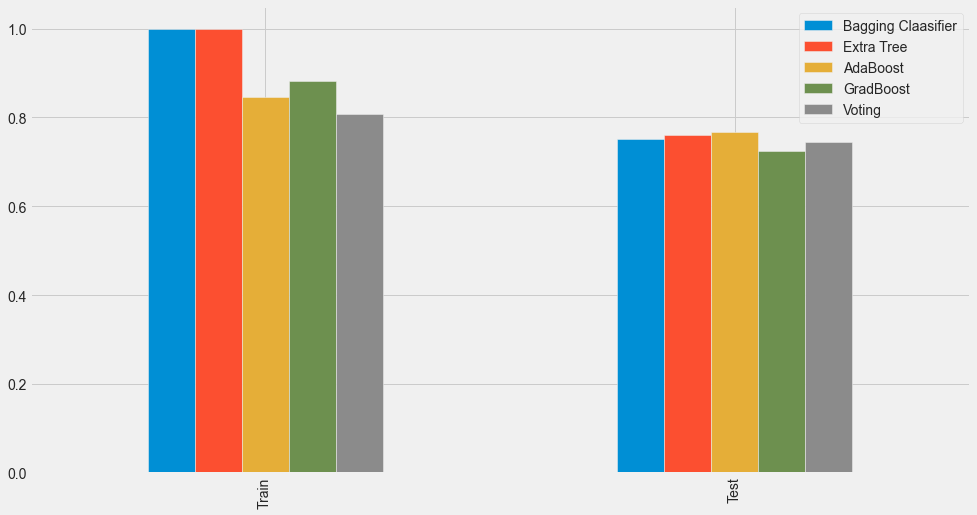

In [29]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind = 'bar', figsize = (15,8))